In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [2]:
(x_train_load, y_train_load), (x_test_load, y_test_load) = cifar10.load_data()
# 處理數據
x_train_load = x_train_load[:100]
y_train_load = y_train_load[:100]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)
# print(set(y_test_load))


(20, 32, 32, 3)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


In [3]:
# Data normalization

# x_train = x_train_load.reshape((x_train_load.shape[0], 32, 32, 3)).astype('float32') / 255     # ==> 39s
# x_test = x_test_load.reshape((x_test_load.shape[0], 32, 32, 3)).astype('float32') / 255
x_train = x_train_load / 255     # ==> 39s
x_test = x_test_load / 255

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train_load)
y_test = to_categorical(y_test_load)
print(x_test.shape)
print(y_test[4])


(20, 32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [4]:
print(x_test_load[0].shape)


(32, 32, 3)


In [8]:
# # 建立模型
# model = Sequential([
#     Flatten(input_shape=(28, 28, 1)),
#     Dense(20, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))


# model = Sequential()  
# model.add(Conv2D(32, (3, 3), input_shape = 32, 32, 3), activation = 'relu'))
# model.add(MaxPooling2D( (2, 2)))
# # Second convolutional layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D( (2, 2)))

# # Third convolutional layer
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense( 128, activation = 'relu'))
# model.add(Dense( 10, activation = 'softmax'))




# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/50
2/2 [==============================] - 3s 855ms/step - loss: 2.3381 - accuracy: 0.0800 - val_loss: 2.3159 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 174ms/step - loss: 2.3111 - accuracy: 0.0800 - val_loss: 2.3236 - val_accuracy: 0.0500
Epoch 3/50
2/2 [==============================] - 0s 203ms/step - loss: 2.2992 - accuracy: 0.1200 - val_loss: 2.3307 - val_accuracy: 0.1000
Epoch 4/50
2/2 [==============================] - 0s 164ms/step - loss: 2.2845 - accuracy: 0.1600 - val_loss: 2.3422 - val_accuracy: 0.1000
Epoch 5/50
2/2 [==============================] - 0s 185ms/step - loss: 2.2772 - accuracy: 0.1600 - val_loss: 2.3555 - val_accuracy: 0.1000
Epoch 6/50
2/2 [==============================] - 0s 106ms/step - loss: 2.2692 - accuracy: 0.1600 - val_loss: 2.3683 - val_accuracy: 0.1000
Epoch 7/50
2/2 [==============================] - 0s 170ms/step - loss: 2.2617 - accuracy: 0.1400 - val_loss: 2.3840 - val_accuracy: 0.1000
Epoch 8/50
2/2 [

In [9]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred_label = np.argmax(y_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

4/4 [==============================] - 0s 6ms/step
Confusion Matrix:
[[ 2  3  0  0  1  0  0  0  0  0]
 [ 0 14  0  1  0  0  0  1  0  0]
 [ 0  1  9  0  1  0  1  1  0  0]
 [ 1  2  4  1  0  0  1  2  0  2]
 [ 0  1  1  0  9  0  0  0  0  0]
 [ 0  1  2  0  0  1  0  2  0  1]
 [ 0  1  1  0  2  0  3  0  0  0]
 [ 0  2  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  2  0  2]
 [ 0  0  0  0  0  0  0  1  0 11]]


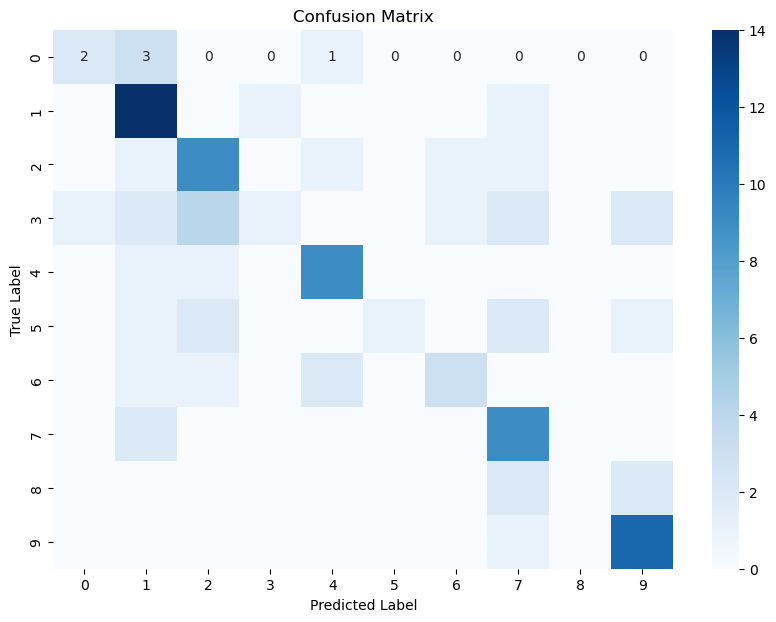

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

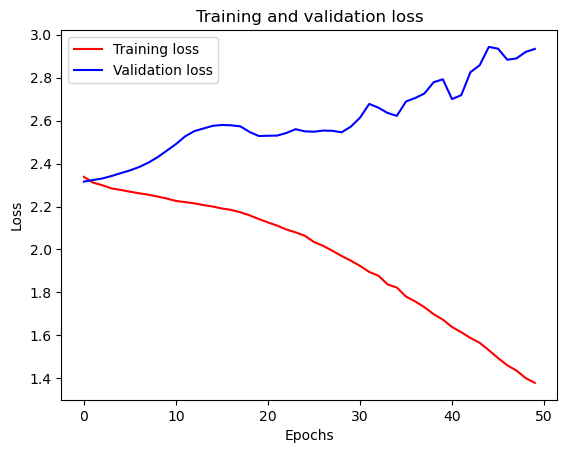

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test a|ccuracy:', test_acc)

1/1 [==============================] - 0s 61ms/step - loss: 2.9340 - accuracy: 0.1000
Test a|ccuracy: 0.10000000149011612


In [13]:
y_pred = model.predict(x_test)
print(y_pred.shape)

# print(|y_pred)
y_pred_label = np.argmax(y_pred, axis=1)    
print('y_pred: ', y_pred_label)

1/1 [==============================] - 0s 54ms/step
(20, 10)
y_pred:  [6 9 9 1 6 4 3 4 2 9 1 9 3 1 1 3 1 2 9 4]


In [14]:
# 找出預測錯誤的索引
y_pred = model.predict(x_test)
print('y_shape: ', y_pred.shape)

y_pred_label = np.argmax(y_pred, axis=1)  # axis=1：沿著行查找每行的最大值的索引。axis=0：沿著列查找每列的最大值的索引。
y_test_label = np.argmax(y_test, axis=1)

print('y_pred: ', y_pred_label)
print('y_test: ', y_test_label)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Index of Prediction errors:  {errors} ')
print(f'Total number of prediction errors: {len(errors)}')

1/1 [==============================] - 0s 88ms/step
y_shape:  (20, 10)
y_pred:  [6 9 9 1 6 4 3 4 2 9 1 9 3 1 1 3 1 2 9 4]
y_test:  [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Index of Prediction errors:  [ 0  1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 18 19] 
Total number of prediction errors: 18


## Exercise : Try to visualize the wrong predictions

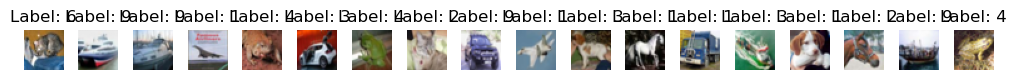

In [15]:
# 使用 matplotlib 顯示多張圖像
# 設置圖像數量
num_images = len(errors)

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_test[errors[i]])
    ax.set_title(f'Label: {y_pred_label[errors[i]]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()